In [1]:
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stix'

import hoomd
import gsd.hoomd

import freud

def compute_op(snapshot):
    r_cut = 1.2
    box = snapshot.configuration.box
    points = snapshot.particles.position

    system = freud.AABBQuery(box, points)
    args = {"num_neighbors": 6, "exclude_ii": True}
    nlist = system.query(points, args).toNeighborList()
    d6 = (nlist.distances/r_cut)**6
    d12 = d6**2
    cn = (1-d6)/(1-d12+1e-11)
    return np.sum(cn)/343

In [2]:
traj = gsd.hoomd.open('./DATA/randomized.gsd', 'rb')
traj = traj[100:]

In [3]:
op_arr = []
for frame in traj:
    op_current = compute_op(frame)
    op_arr.append(op_current)
    
op_arr = np.asarray(op_arr)

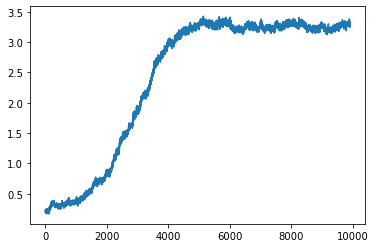

In [4]:
plt.plot(op_arr)

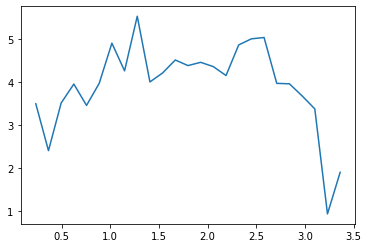

In [5]:
hist = np.histogram(op_arr, bins=25)
prob = hist[0]/np.sum(hist[0])
freeE = -np.log(prob+1e-11)
mids = 0.5*(hist[1][1:]+hist[1][:-1])

plt.plot(mids, freeE);